#Importing Libraries and stuff

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix




#Reading the dataframe

In [ ]:
df = pd.read_excel('/content/Netflix.xlsx')

In [ ]:
df.head(3)

,Title,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7,Genre8,Genre9,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,Crime,Drama,Fantasy,Horror,Romance,NaN,NaN,NaN,NaN,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,Drama,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube


In [ ]:
len(df.columns)

88

**We have 88 columns in the raw dataset.**

In [ ]:
df.columns

Index(['Title', 'Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6',
       'Genre7', 'Genre8', 'Genre9', 'Genre10', 'Genre11', 'Genre12', 'Tags',
       'Lang1', 'Lang2', 'Lang3', 'Lang4', 'Lang5', 'Lang6', 'Lang7', 'Lang8',
       'Lang9', 'Lang10', 'Lang11', 'Lang12', 'Lang13', 'Lang14',
       'Series or Movie', 'Hidden Gem Score', 'County1', 'Country2', 'County2',
       'Country3', 'County3', 'Country4', 'County4', 'Country5', 'County5',
       'Country6', 'County6', 'Country7', 'County7', 'Country8', 'County8',
       'Country9', 'County9', 'Country10', 'County10', 'Country11', 'County11',
       'Country12', 'County12', 'Country13', 'County13', 'Country14',
       'County14', 'Country15', 'County15', 'Country16', 'County16',
       'Country17', 'County17', 'Country18', 'County18', 'Country19',
       'Runtime', 'Director', 'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For',

#EDA/Feature Selection

Creating a function that gives us a missing values report, as we suspect that we would be using that a lot.

In [ ]:
def missing_values_report(df):
    # Calculate the percentage of missing values for each column
    missing_df = (df.isnull().sum() / len(df)) * 100

    # Sort the percentages in descending order
    missing_df_sorted = missing_df.sort_values(ascending=False)

    return missing_df_sorted

# Usage example:
# missing_report = missing_values_report(your_dataframe)
# print(missing_report.head(40))


In [ ]:
missingvalues = missing_values_report(df)
missingvalues.head(40)

Lang14              99.993540
Lang13              99.993540
Lang12              99.993540
Lang11              99.993540
Genre12             99.993540
Genre11             99.993540
Genre10             99.980620
Lang10              99.974160
Genre9              99.935401
Lang9               99.935401
Lang8               99.857881
Lang7               99.728682
Genre8              99.664083
Lang6               99.263566
Genre7              98.824289
Lang5               98.333333
Genre6              96.698966
Lang4               96.259690
Genre5              91.272610
Lang3               91.098191
Country19           86.731266
County18            81.795866
Country18           79.605943
Genre4              79.515504
County17            78.178295
Lang2               77.299742
Country17           77.241602
County16            76.698966
Country16           76.143411
County15            75.413437
Country15           74.767442
Boxoffice           74.114987
County14            73.888889
Country14 

In [ ]:
missingvalues.tail(40)

County7                  62.771318
Country7                 62.125323
County6                  61.427649
Awards Received          60.755814
Country6                 60.342377
County5                  59.399225
Rotten Tomatoes Score    58.772610
Genre3                   58.288114
Country5                 58.158915
County4                  56.505168
Country4                 54.270026
TMDb Trailer             53.527132
Trailer Site             53.527132
County3                  51.692506
Awards Nominated For     50.510336
Country3                 47.551680
View Rating              45.374677
County2                  43.598191
Genre2                   34.114987
Country2                 33.927649
Director                 30.413437
Writer                   27.971576
Poster                   23.501292
IMDb Link                14.877261
Release Date             13.611111
IMDb Votes               13.572351
Hidden Gem Score         13.572351
IMDb Score               13.559432
Lang1               

In [ ]:
#df.rename(columns={'County1': 'Country'}, inplace=True)
#fixing a typo

**We can see that out of these 88 columns, most of these have so many missing values (represented above in percentage), that they are irrelevant. We will drop these columns so that we have something to work with.**

In [ ]:
columns_to_keep = ['Title', 'Genre1', 'Lang1', 'Hidden Gem Score', 'Country', 'Runtime',
                   'View Rating', 'IMDb Score', 'Rotten Tomatoes Score',
                   'Metacritic Score', 'IMDb Votes','Awards Received']

In [ ]:
df2 = df[columns_to_keep]

In [ ]:
print(df2.columns)
f"The number of columns in df2 is {len(df2.columns)}"

Index(['Title', 'Genre1', 'Lang1', 'Hidden Gem Score', 'Country', 'Runtime',
       'View Rating', 'IMDb Score', 'Rotten Tomatoes Score',
       'Metacritic Score', 'IMDb Votes', 'Awards Received'],
      dtype='object')


'The number of columns in df2 is 12'

In [ ]:
pd.read_csv('data_dictionary.csv')

,Column Name,Description,Data Type,Example Values
0,Unnamed: 0,Index or identifier for each row,Integer,"0, 1, 2, 3..."
1,Title,Title of a movie or TV show,String,"""Lets Fight Ghost"", ""HOW TO BUILD A GIRL""..."
2,Genre1,Primary genre of the movie or TV show,String,"""Crime"", ""Comedy"", ""Drama""..."
3,Lang1,Primary language of the movie or TV show,String,"""Swedish"", ""English"", ""Turkish""..."
4,Hidden Gem Score,Score rating movies or TV shows as hidden gems,Float,"4.3, 7.0, 6.4..."
5,Country,Country of origin of the movie or TV show,String,"""Thailand"", ""Canada"", ""Belgium""..."
6,Runtime,Duration of the movie or TV show,String,"""< 30 minutes"", ""1-2 hour""..."
7,View Rating,Viewer rating of the movie or TV show,String,"""R"", ""Unrated""..."
8,IMDb Score,IMDb score of the movie or TV show,Float,"7.9, 5.8, 6.5..."
9,Rotten Tomatoes Score,Rotten Tomatoes score of the movie or TV show,Float,"98.0, 79.0, NaN..."


Now that we have a working dataset, let's do some EDA on it

Checking for missing values:

In [ ]:
missingdf2 = missing_values_report(df2)
missingdf2

Metacritic Score         71.989664
Awards Received          60.755814
Rotten Tomatoes Score    58.772610
View Rating              45.374677
Hidden Gem Score         13.572351
IMDb Votes               13.572351
IMDb Score               13.559432
Lang1                    12.500000
Genre1                   11.046512
Country                   0.122739
Runtime                   0.006460
Title                     0.000000
dtype: float64

Some of our most important numerical values have a bunch of missing values, we will have to deal with them

In [ ]:
df2.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,IMDb Votes,Awards Received
count,13379.000000,13381.000000,6382.000000,4336.000000,1.337900e+04,6075.000000
mean,5.937551,6.496054,59.523034,56.813653,4.272841e+04,8.764444
std,2.250202,1.146910,26.999173,17.582545,1.257012e+05,18.311171
min,0.600000,1.000000,0.000000,5.000000,5.000000e+00,1.000000
25%,3.800000,5.800000,38.000000,44.000000,4.035000e+02,1.000000
50%,6.800000,6.600000,64.000000,57.000000,2.322000e+03,3.000000
75%,7.900000,7.300000,83.000000,70.000000,2.089050e+04,8.000000
max,9.800000,9.700000,100.000000,100.000000,2.354197e+06,300.000000


We should look for any multicollinearity before dealing with missing values.

<ipython-input-53-5017219e7492>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df2.corr()


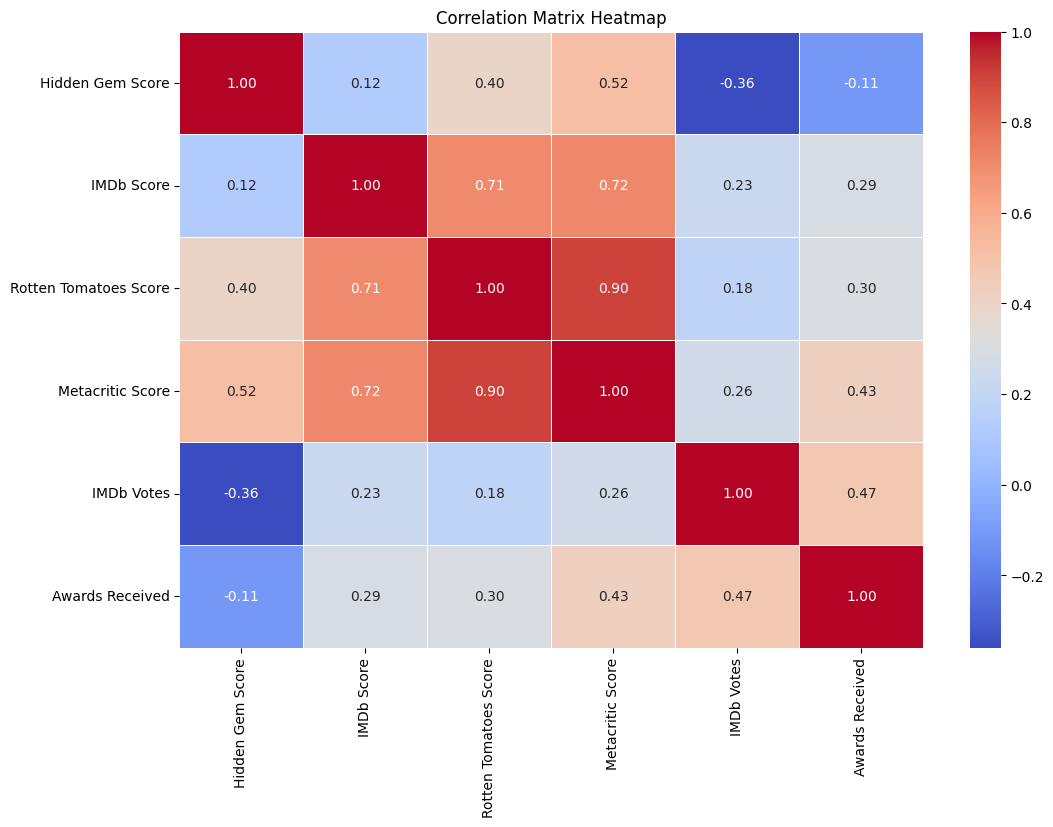

In [ ]:
corr_matrix = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


We can drop metacritic score, as it has collinearity with rotten tomatoes score, and has higher number of missing values.

In [ ]:
#df2 = df2.drop('Metacritic Score', axis=1)
df2.head()


,Title,Genre1,Lang1,Hidden Gem Score,Country,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,IMDb Votes,Awards Received
0,Lets Fight Ghost,Crime,Swedish,4.3,Thailand,< 30 minutes,R,7.9,98.0,205926.0,74.0
1,HOW TO BUILD A GIRL,Comedy,English,7.0,Canada,1-2 hour,R,5.8,79.0,2838.0,1.0
2,Centigrade,Drama,English,6.4,Canada,1-2 hour,Unrated,4.3,NaN,1720.0,NaN
3,ANNE+,Drama,Turkish,7.7,Belgium,< 30 minutes,NaN,6.5,NaN,1147.0,1.0
4,Moxie,Animation,English,8.1,Lithuania,1-2 hour,NaN,6.3,NaN,63.0,NaN


In [ ]:
missing_values_report(df2)

Awards Received          60.755814
Rotten Tomatoes Score    58.772610
View Rating              45.374677
Hidden Gem Score         13.572351
IMDb Votes               13.572351
IMDb Score               13.559432
Lang1                    12.500000
Genre1                   11.046512
Country                   0.122739
Runtime                   0.006460
Title                     0.000000
dtype: float64

Now we can go ahead with the listwise deletion of the top 2 columns from the list above, excluding Awards Received, as it will be our target variable.

#Feature Engineering

In [ ]:
variables_for_listwise_deletion = ['Rotten Tomatoes Score', 'View Rating']
df3 = df2.dropna(subset=variables_for_listwise_deletion)
df3.shape

(5405, 11)

In [ ]:
missing_values_report(df3)

Awards Received          37.095282
Lang1                     0.314524
Country                   0.129510
Title                     0.000000
Genre1                    0.000000
Hidden Gem Score          0.000000
Runtime                   0.000000
View Rating               0.000000
IMDb Score                0.000000
Rotten Tomatoes Score     0.000000
IMDb Votes                0.000000
dtype: float64

The only column that has missing values is the awards received column, which represents the number of awards a movie/series has received. Let us see the distribution of the awards received column.

In [ ]:
df3['Awards Received'].value_counts()

1.0      814
2.0      481
3.0      332
4.0      239
5.0      169
        ... 
96.0       1
194.0      1
239.0      1
60.0       1
152.0      1
Name: Awards Received, Length: 124, dtype: int64

We can see that there are no rows with 0 awards received, which means that all the missing values are the ones with 0 awards received. We will now convert this column into a binary variable, 1=award won, 0=no awards. We will do that by filling all missing values with 0 and anything else with one.

In [ ]:
df4 = df3.copy()

In [ ]:
df4.loc[:, 'Awards Won'] = df4['Awards Received'].apply(lambda x: 0 if pd.isna(x) else 1)
df4.drop('Awards Received', axis=1, inplace=True)

In [ ]:
df4.head()

,Title,Genre1,Lang1,Hidden Gem Score,Country,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,IMDb Votes,Awards Won
0,Lets Fight Ghost,Crime,Swedish,4.3,Thailand,< 30 minutes,R,7.9,98.0,205926.0,1
1,HOW TO BUILD A GIRL,Comedy,English,7.0,Canada,1-2 hour,R,5.8,79.0,2838.0,1
11,The Invisible,Crime,English,2.0,Lithuania,1-2 hour,PG-13,6.2,20.0,34738.0,0
15,Joker,Crime,English,3.5,Lithuania,1-2 hour,R,8.4,68.0,26570.0,1
16,I,Action,English,2.8,Lithuania,1-2 hour,PG,6.5,52.0,26570.0,1


In [ ]:
missing_values_report(df4)

Lang1                    0.314524
Country                  0.129510
Title                    0.000000
Genre1                   0.000000
Hidden Gem Score         0.000000
Runtime                  0.000000
View Rating              0.000000
IMDb Score               0.000000
Rotten Tomatoes Score    0.000000
IMDb Votes               0.000000
Awards Won               0.000000
dtype: float64

We can now see that there are almost no missing values in our dataset (the negligible amount of missing data can be ignored).

In [ ]:
df4.dtypes

Title                     object
Genre1                    object
Lang1                     object
Hidden Gem Score         float64
Country                   object
Runtime                   object
View Rating               object
IMDb Score               float64
Rotten Tomatoes Score    float64
IMDb Votes               float64
Awards Won                 int64
dtype: object

**Let's look for outliers.**

In [ ]:
boxplot_variables = ['Hidden Gem Score', 'IMDb Score', 'IMDb Votes', 'Rotten Tomatoes Score']

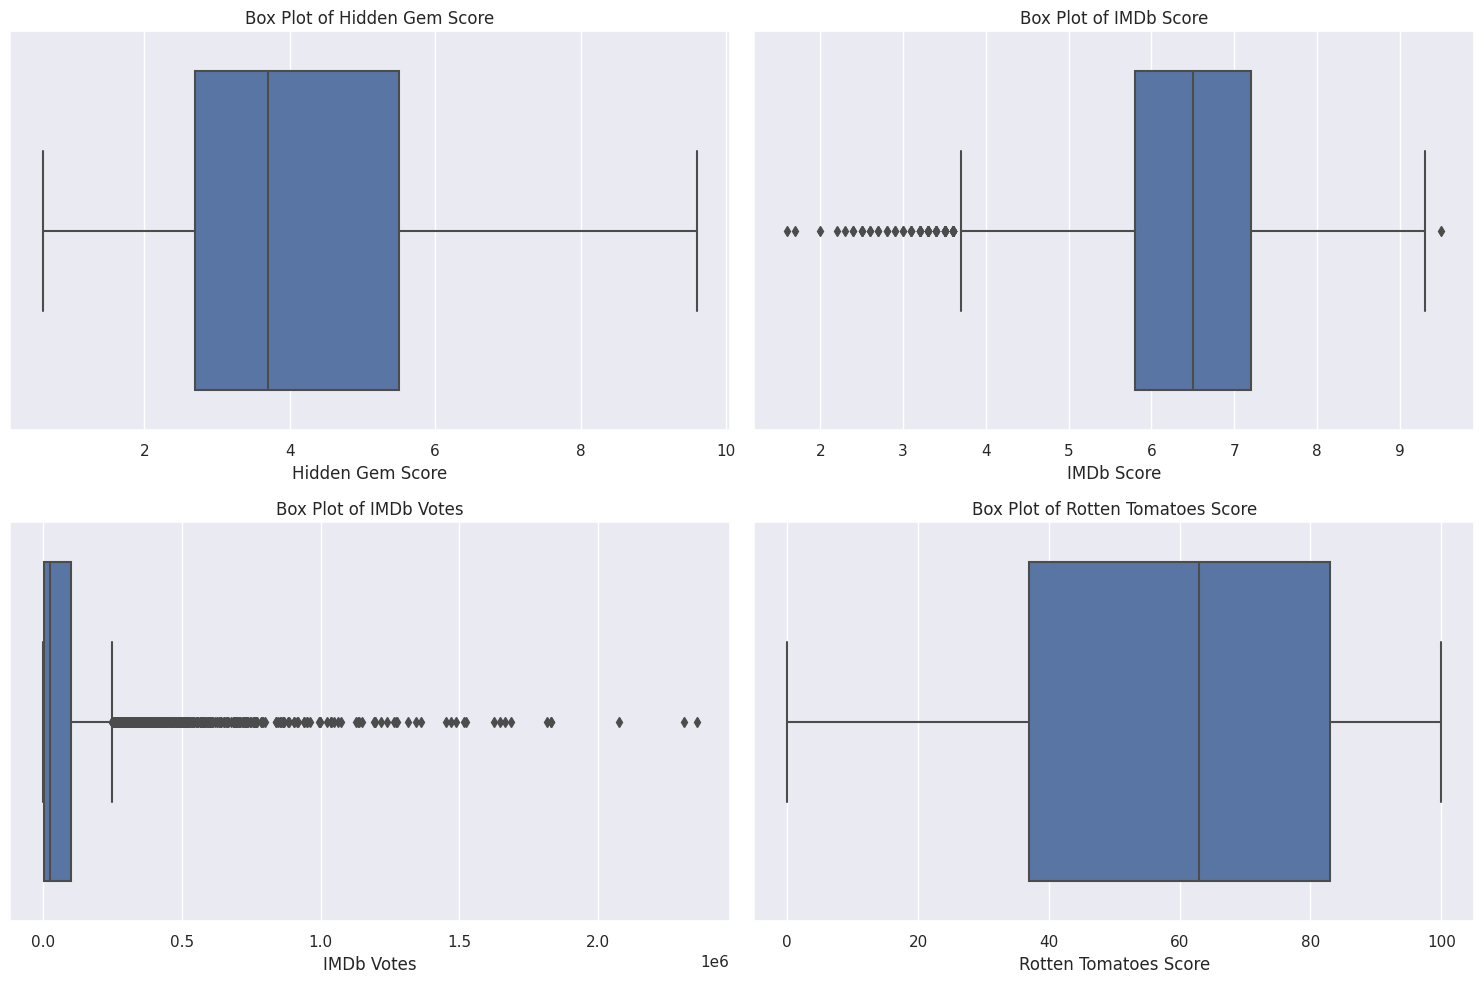

In [ ]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 5 * 2))
axes = axes.flatten()
for i, var in enumerate(boxplot_variables):
    sns.boxplot(x=df4[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

From the boxplots, there are chances that IMDb votes and IMDb Score have outliers, let's run a simple loop to check.

In [ ]:
outlier_variables = ['Hidden Gem Score', 'IMDb Score', 'IMDb Votes', 'Rotten Tomatoes Score']

In [ ]:
outliers_count = {}
for column in outlier_variables:
    Q1 = df4[column].quantile(0.25)
    Q3 = df4[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR


    num_outliers = ((df4[column] < lower_bound) | (df4[column] > upper_bound)).sum()

    outliers_count[column] = num_outliers


In [ ]:
outliers_count

{'Hidden Gem Score': 0,
 'IMDb Score': 0,
 'IMDb Votes': 288,
 'Rotten Tomatoes Score': 0}

There are 288 major outliers in IMDb Votes, however, no major outliers in the other numeric variables.

We can either impute these outliers with the mean/median or just filter them out; since we have already deleted a large chunk of the dataset, let's try imputing them first. We can later try running another model with the outliers filtered and compare it with the one that has outliers imputed

We will check skewness of the variable IMDb Votes, to figure out whether a mean would be appropriate to impute or the median.

In [ ]:
df4['IMDb Votes'].skew()

4.51232299990566

Since the skewness is so high, we cannot use the mean to impute these values because the mean is very sensitive to extreme values, and that will affect our analysis. So we will go ahead with the median imputation for our case.

In [ ]:
Q1 = df4['IMDb Votes'].quantile(0.25)
Q3 = df4['IMDb Votes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
#Median of the 'IMDb Votes' column
median_imdb_votes = df4['IMDb Votes'].median()

# Imputing the outliers with the median value
df4['IMDb Votes'] = df4['IMDb Votes'].apply(lambda x: median_imdb_votes if x < lower_bound or x > upper_bound else x)


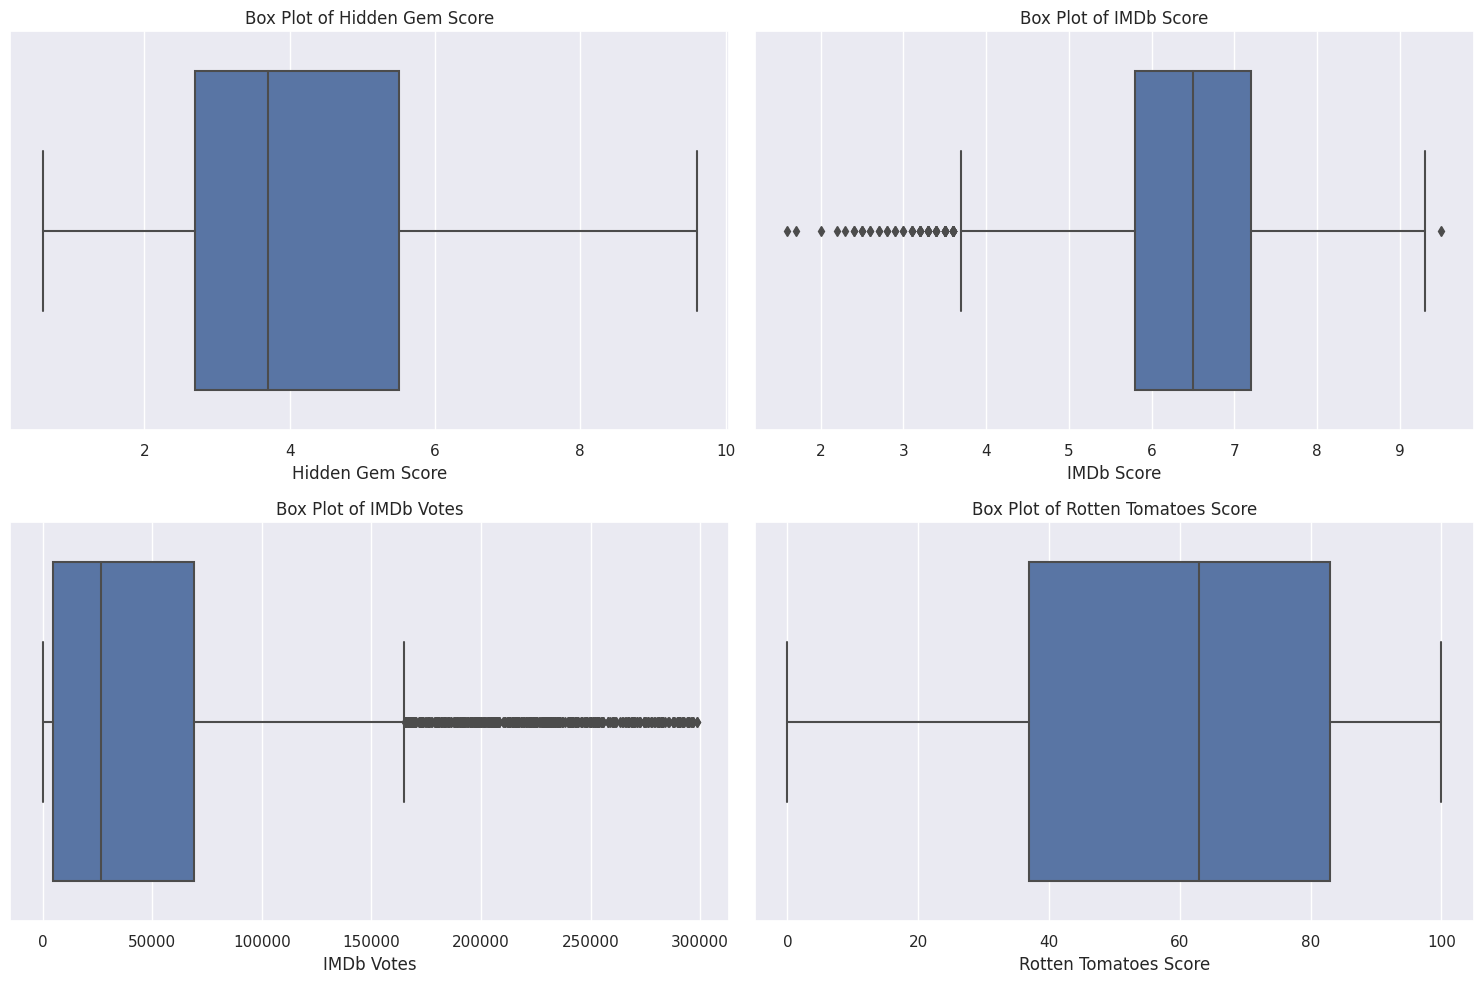

In [ ]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 5 * 2))
axes = axes.flatten()
for i, var in enumerate(boxplot_variables):
    sns.boxplot(x=df4[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

We can see that the boxplot of the IMDb Votes variable looks much better than it did before.

#One-Hot Encoding

We will now create dummy variables for the necessary string variables.

In [ ]:
df5 = df4.copy()

In [ ]:
df5 = pd.get_dummies(df5, columns=["Genre1"], prefix=["Genre"])

In [ ]:
df5 = pd.get_dummies(df5, columns=["Lang1"], prefix=["Lang"])

In [ ]:
df5 = pd.get_dummies(df5, columns=["View Rating"], prefix=["Rating"])

In [ ]:
df5 = pd.get_dummies(df5, columns=["Runtime"], prefix=["Runtime"])

In [ ]:
df5 = pd.get_dummies(df5, columns=["Country"], prefix=["Country"])

Dropping some dummies so we don't get caught in the dummy variable trap.

In [ ]:
df_cleaned = df5.drop(['Genre_Action', 'Rating_R', 'Lang_Zulu', 'Country_Slovakia', 'Runtime_1-2 hour'], axis=1)
df_cleaned.shape

(5405, 142)

Creating a scaled dataset so we can have it handy before running the model.

In [ ]:
featurestoscale = ['Hidden Gem Score', 'IMDb Score', 'IMDb Votes', 'Rotten Tomatoes Score']

In [ ]:

scaler = StandardScaler()

df_scaled = df_cleaned.copy()

df_scaled[featurestoscale] = scaler.fit_transform(df_scaled[featurestoscale])

df_scaled.head(1)

,Title,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,IMDb Votes,Awards Won,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,...,Country_Singapore,Country_South Africa,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_Turkey,Country_United Kingdom,Country_United States
0,Lets Fight Ghost,0.083208,1.403811,1.423489,2.356332,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#Running the model

**Before we run the model, let's check for any missing values just to be cautious**

In [ ]:
missing_values_report(df_scaled)

Title                    0.0
Rating_TV-G              0.0
Rating_NC-17             0.0
Rating_Not Rated         0.0
Rating_PG                0.0
                        ... 
Lang_English             0.0
Lang_Dutch               0.0
Lang_Dari                0.0
Lang_Danish              0.0
Country_United States    0.0
Length: 142, dtype: float64

In [ ]:
predictive_df = df_scaled.drop(['Title'], axis=1)

# Define features (X) and target (y)
X = predictive_df.drop('Awards Won', axis=1)
y = predictive_df['Awards Won']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[226 194]
 [ 92 569]]


In [ ]:
# Obtained confusion matrix:
confusion_matrix = [[226, 194], [92, 569]]

# Assigning the values:
TN, FP, FN, TP = confusion_matrix[0][0], confusion_matrix[0][1], confusion_matrix[1][0], confusion_matrix[1][1]

# Printing statements
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Positives: {TP}")

True Negatives: 226
False Positives: 194
False Negatives: 92
True Positives: 569


In [ ]:
Awards_perc = df5['Awards Won'].mean() * 100


# Print the results, rounding to 2 decimal places
if Awards_perc > 49.9:
    null = round(Awards_perc, 2)
else:
    null = round(100 - Awards_perc, 2)

print(f"Null Model: {null}%")

Null Model: 62.9%


In [ ]:
pred_power = round(((TN + TP) / (TN + TP + FN + FP))*100, 2)

print(f"Predictive Power: {pred_power}%")

Predictive Power: 73.54%


In [ ]:
sensitivity = round(((TP) / (TP + FN))*100, 2)

print(f"Sensitivity: {sensitivity}%")

Sensitivity: 86.08%


In [ ]:
precision = round(((TP) / (TP + FP))*100, 2)

print(f"Precision: {precision}%")

Precision: 74.57%


In [ ]:
specificity = round(((TN) / (FP + TN))*100, 2)

print(f"Specificity: {specificity}%")

Specificity: 53.81%


In [ ]:

# Assuming 'log_reg' is your trained logistic regression model
# and 'X' contains your feature names

# Get the coefficients from the model
coefficients = log_reg.coef_[0]

# Calculate the exponentiated coefficients (odds ratios)
odds_ratios = np.exp(coefficients)

# Print the odds ratios for each feature
for feature, odds in zip(X.columns, odds_ratios):
    print(f"{feature}: Odds Ratio = {odds:.4f}")

Hidden Gem Score: Odds Ratio = 0.5961
IMDb Score: Odds Ratio = 1.2193
Rotten Tomatoes Score: Odds Ratio = 2.4687
IMDb Votes: Odds Ratio = 1.7347
Genre_Adventure: Odds Ratio = 0.9695
Genre_Animation: Odds Ratio = 1.0569
Genre_Biography: Odds Ratio = 1.1079
Genre_Comedy: Odds Ratio = 1.0561
Genre_Crime: Odds Ratio = 1.1412
Genre_Documentary: Odds Ratio = 1.0441
Genre_Drama: Odds Ratio = 1.3933
Genre_Family: Odds Ratio = 0.8915
Genre_Fantasy: Odds Ratio = 0.9981
Genre_History: Odds Ratio = 1.1238
Genre_Horror: Odds Ratio = 1.0524
Genre_Music: Odds Ratio = 1.0000
Genre_Musical: Odds Ratio = 1.0000
Genre_Mystery: Odds Ratio = 1.0599
Genre_Reality-TV: Odds Ratio = 0.8950
Genre_Romance: Odds Ratio = 0.9440
Genre_Sci-Fi: Odds Ratio = 1.0349
Genre_Thriller: Odds Ratio = 1.0685
Genre_War: Odds Ratio = 1.0961
Genre_Western: Odds Ratio = 1.0364
Lang_Afrikaans: Odds Ratio = 1.1296
Lang_Albanian: Odds Ratio = 0.8945
Lang_American Sign Language: Odds Ratio = 0.9680
Lang_Arabic: Odds Ratio = 1.0850
La